In [1]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Loading the data
path = "/kaggle/input/amazon-fine-food-reviews/Reviews.csv"
reviews = pd.read_csv(path)
reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


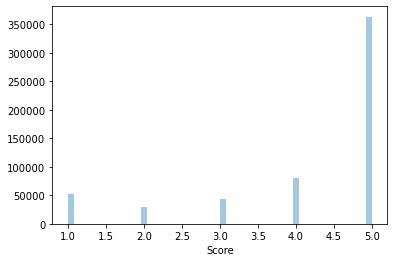

In [4]:
# Visualizing the score
sns.distplot(a=reviews["Score"], kde=False)

In [5]:
# Removing rows with score of 3
filtered_reviews = reviews.loc[reviews["Score"].isin([1, 2, 4, 5])]

def category(x):
    if x > 3:
        return 1
    else:
        return 0
    
ratings = filtered_reviews["Score"].map(category)
filtered_reviews["Score"] = ratings

filtered_reviews.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
# Data cleaning
sorted_reviews = filtered_reviews.sort_values(by="ProductId", axis=0, ascending=True)
final_reviews = sorted_reviews.drop_duplicates(subset={"UserId", "ProfileName", "Time", "Text"}, keep="first", inplace=False)
final_reviews.shape

(364173, 10)

In [7]:
# % of data left
(final_reviews.size*1.0 / filtered_reviews.size*1.0) * 100

69.25890143662969

In [8]:
# Removing incorrect entries
final_reviews = final_reviews[final_reviews.HelpfulnessNumerator <= final_reviews.HelpfulnessDenominator]
final_reviews.shape

(364171, 10)

In [9]:
# Value counts
final_reviews["Score"].value_counts()

1    307061
0     57110
Name: Score, dtype: int64

In [10]:
# Making a list of stopwords
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

stemmer = SnowballStemmer("english")
stop_words = stopwords.words("english")

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
# Text preprocessing
from tqdm import tqdm
from bs4 import BeautifulSoup
import re
import contractions
preprocessed_reviews = []

for sentence in tqdm(final_reviews['Text'].values):
    sentence = re.sub(r"http\S+", "", sentence)
    sentence = BeautifulSoup(sentence, 'lxml').get_text()
    sentence = contractions.fix(sentence)
    sentence = re.sub("\S*\d\S*", "", sentence).strip()
    sentence = re.sub('[^A-Za-z]+', ' ', sentence)
    sentence = sentence.lower()
    sentence = stemmer.stem(sentence)
    sentence = " ".join([word for word in sentence.split() if word not in stop_words])
    preprocessed_reviews.append(sentence)

100%|██████████| 364171/364171 [05:18<00:00, 1143.06it/s]


In [12]:
# Appending the cleaned text to the dataset
final_reviews["Cleaned Text"] = preprocessed_reviews
final_reviews.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Cleaned Text
150523,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,1,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witty little book makes son laugh loud recite ...
150505,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,1,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew reading sendak books watching really rosi...
150506,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,1,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn months year learn poems...
150507,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,1,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great little book read aloud nice rhythm well ...
150508,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,1,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetry months year goes month cute little...


In [13]:
# Saving the database
final_reviews.to_csv(path_or_buf="cleaned_reviews.csv", index=False)

In [14]:
# Creating vocubulary
corpus = []

for text in tqdm(final_reviews["Cleaned Text"]):
    for word in text.strip().split():
        corpus.append(word.strip())
    
print(len(corpus))

100%|██████████| 364171/364171 [00:05<00:00, 61137.93it/s]

13791370


In [15]:
# Word count
from collections import Counter
word_count = Counter(corpus)
print("Unique words =", len(word_count))
word_count.most_common(5)

Unique words = 116702


[('like', 153172),
 ('good', 124095),
 ('great', 108403),
 ('one', 106798),
 ('taste', 104920)]

In [16]:
# Creating word count dataframe
word_count_df = []

for idx, (word, count) in enumerate(word_count.most_common(len(word_count))):
    word_count_df.append([idx+1, word, count])

word_count_df = pd.DataFrame(columns=["Index", "Word", "Count"], data=word_count_df)    
word_count_df.head()

,Index,Word,Count
0,1,like,153172
1,2,good,124095
2,3,great,108403
3,4,one,106798
4,5,taste,104920


In [17]:
# Creating word count dictionary
word_count_dict = {}

for _, row in word_count_df.iterrows():
    word_count_dict[row["Word"]] = [row["Index"], row["Count"]]

print(word_count_dict)

{'like': [1, 153172], 'good': [2, 124095], 'great': [3, 108403], 'one': [4, 106798], 'taste': [5, 104920], 'product': [6, 98009], 'would': [7, 95114], 'flavor': [8, 87447], 'coffee': [9, 87025], 'tea': [10, 84378], 'love': [11, 79470], 'get': [12, 66368], 'food': [13, 62479], 'really': [14, 61552], 'amazon': [15, 58914], 'use': [16, 56768], 'much': [17, 56553], 'also': [18, 53960], 'time': [19, 53599], 'little': [20, 51068], 'best': [21, 50211], 'buy': [22, 48937], 'find': [23, 48919], 'price': [24, 48359], 'make': [25, 48158], 'well': [26, 47082], 'tried': [27, 47021], 'even': [28, 46712], 'better': [29, 43006], 'try': [30, 42833], 'chocolate': [31, 40004], 'eat': [32, 39374], 'sugar': [33, 37997], 'first': [34, 37529], 'water': [35, 37111], 'used': [36, 36591], 'could': [37, 36487], 'found': [38, 34971], 'made': [39, 33278], 'sweet': [40, 33060], 'bought': [41, 32335], 'free': [42, 32220], 'bag': [43, 32205], 'drink': [44, 31651], 'box': [45, 31450], 'dog': [46, 31411], 'cup': [47, 3

In [18]:
# Data preprocessing
indexed_X = []
indexed_y = []

for sentence in final_reviews["Cleaned Text"]:
    indexed_X.append([word_count_dict[word][0] for word in sentence.strip().split()])

indexed_y = final_reviews["Score"]

In [19]:
# Data loader
from sklearn.model_selection import train_test_split

def load_data(num_words):
    X = indexed_X
    y = indexed_y
    
    for i in range(len(X)):
        for j in range(len(X[i])):
            if X[i][j] > num_words:
                X[i][j] = 0
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    return (X_train, y_train), (X_test, y_test)

In [20]:
# Importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


In [21]:
top_words = 5000
(X_train, y_train), (X_test, y_test) = load_data(num_words=top_words)

In [22]:
# Truncate and/or pad input sequences
max_review_length = 600

X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

print(X_train.shape)
print(X_train[1])

(243994, 600)
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0   

In [23]:
# Build the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words+1, embedding_vecor_length, input_length=max_review_length))
model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 600, 32)           160032    
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 213,333
Trainable params: 213,333
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
model.fit(X_train, y_train, nb_epoch=10, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
243994/243994 [==============================] - 2365s 10ms/step - loss: 0.2130 - accuracy: 0.9159
Epoch 2/10
243994/243994 [==============================] - 2382s 10ms/step - loss: 0.1766 - accuracy: 0.9311
Epoch 3/10
243994/243994 [==============================] - 2384s 10ms/step - loss: 0.1602 - accuracy: 0.9372
Epoch 4/10
243994/243994 [==============================] - 2406s 10ms/step - loss: 0.1487 - accuracy: 0.9418
Epoch 5/10
243994/243994 [==============================] - 2367s 10ms/step - loss: 0.1406 - accuracy: 0.9453
Epoch 6/10
243994/243994 [==============================] - 2372s 10ms/step - loss: 0.1316 - accuracy: 0.9491
Epoch 7/10
243994/243994 [==============================] - 2374s 10ms/step - loss: 0.1221 - accuracy: 0.9529
Epoch 8/10
243994/243994 [==============================] - 2242s 9ms/step - loss: 0.0924 - accuracy: 0.9651
Accuracy: 92.45%
